# Problem Set 6

See [Merge](../pandas/merge.ipynb), [Reshape](../pandas/reshape.ipynb), and [GroupBy](../pandas/groupby.ipynb)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import qeds

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

## Questions 1-7

Lets start with a relatively straightforward exercise before we get to the really fun stuff.

The following code loads a cleaned piece of census data from Statistics Canada.

In [2]:
df = pd.read_csv("https://datascience.quantecon.org/assets/data/canada_census.csv", header=0, index_col=False)
df.head()

,CDcode,Pname,Population,CollegeEducated,PercentOwnHouse,Income
0,1001,Newfoundland and Labrador,270350,24.8,74.1,74676
1,1002,Newfoundland and Labrador,20370,7.5,86.3,60912
2,1003,Newfoundland and Labrador,15560,7.3,86.0,56224
3,1004,Newfoundland and Labrador,20385,10.9,73.7,44282
4,1005,Newfoundland and Labrador,42015,17.0,73.9,62565


A *census division* is a geographical area, smaller than a Canadian province, that is used to
organize information at a slightly more granular level than by province or by city. The census
divisions are shown below.

<img src="https://datascience.quantecon.org/assets/_static/pandas_files/canada_censusdivisions_map.png" alt="canada_censusdivision_map.png" style="">

  
The data above contains information on the population, percent of population with a college
degree, percent of population who own their house/apartment, and the median after-tax income at the
*census division* level.

Hint: The `groupby` is the key here.  You will need to practice different split, apply, and combine options.

### Question 1

Assume that you have a separate data source with province codes and names.

In [3]:
df_provincecodes = pd.DataFrame({
    "Pname" : [ 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
                'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
                'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories','Nunavut'],
    "Code" : ['NL', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC', 'YT', 'NT', 'NU']
            })
df_provincecodes

,Pname,Code
0,Newfoundland and Labrador,NL
1,Prince Edward Island,PE
2,Nova Scotia,NS
3,New Brunswick,NB
4,Quebec,QC
5,Ontario,ON
6,Manitoba,MB
7,Saskatchewan,SK
8,Alberta,AB
9,British Columbia,BC


With this,

1. Either merge or join these province codes into the census dataframe to provide province codes for each province
  name. Hint: You need to figure out which “key” matches in the merge, and don’t be afraid to rename columns for convenience.  
1. Drop the province names from the resulting dataframe.  
1. Rename the column with the province codes to “Province”.  Hint: `.rename(columns = <YOURDICTIONARY>)`  

In [4]:
# Your code here
dfm = pd.merge(df, df_provincecodes, on='Pname', how='left')
dfm.drop('Pname', axis=1, inplace=True)
dfm.rename(columns = {'Code':'Province'}, inplace=True)
dfm.head()

,CDcode,Population,CollegeEducated,PercentOwnHouse,Income,Province
0,1001,270350,24.8,74.1,74676,NL
1,1002,20370,7.5,86.3,60912,NL
2,1003,15560,7.3,86.0,56224,NL
3,1004,20385,10.9,73.7,44282,NL
4,1005,42015,17.0,73.9,62565,NL


For this particular example, you could have renamed the column using `replace`. This is a good check.

In [5]:
(pd.read_csv("https://datascience.quantecon.org/assets/data/canada_census.csv", header=0, index_col=False)
.replace({
    "Alberta": "AB", "British Columbia": "BC", "Manitoba": "MB", "New Brunswick": "NB",
    "Newfoundland and Labrador": "NL", "Northwest Territories": "NT", "Nova Scotia": "NS",
    "Nunavut": "NU", "Ontario": "ON", "Prince Edward Island": "PE", "Quebec": "QC",
    "Saskatchewan": "SK", "Yukon": "YT"})
.rename(columns={"Pname" : "Province"})
.head()
)

,CDcode,Province,Population,CollegeEducated,PercentOwnHouse,Income
0,1001,NL,270350,24.8,74.1,74676
1,1002,NL,20370,7.5,86.3,60912
2,1003,NL,15560,7.3,86.0,56224
3,1004,NL,20385,10.9,73.7,44282
4,1005,NL,42015,17.0,73.9,62565


### Question 2

Which province has the highest population? Which has the lowest?

In [6]:
# Your code here
provincesums=dfm.groupby("Province").sum().sort_values('Population')

print(f"{provincesums.index[-1]} has the largest population")
print(f"{provincesums.index[0]} has the smallest population")



ON has the largest population
YT has the smallest population


### Question 3

Show a bar plot and a pie plot of the province populations.  Hint: After the split-apply-combine, you can use `.plot.bar()` or `.plot.pie()`.

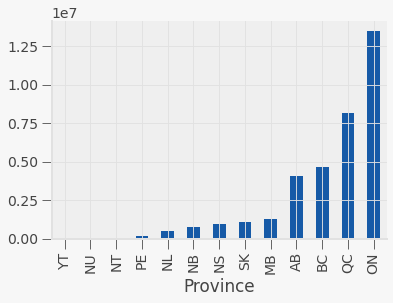

In [7]:
# Your code here
provincesums['Population'].plot.bar()

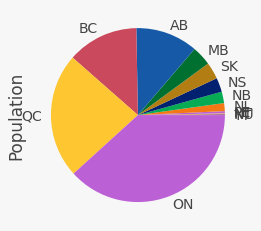

In [8]:
provincesums['Population'].plot.pie()

### Question 3

Which province has the highest percent of individuals with a college education? Which has the
lowest?

Hint: Remember to weight this calculation by population!

In [9]:
# Your code here
def weightedmeans(groupdf, weights='Population', columns=['CollegeEducated','PercentOwnHouse']):
    out = {}
    for c in columns :
        out[c] = (groupdf[c]*groupdf[weights]).sum()/groupdf[weights].sum()
    return(pd.Series(out))

weightedmeans(dfm)
provincemeans=dfm.groupby("Province").apply(weightedmeans).sort_values('CollegeEducated')
print(f"{provincemeans.index[-1]} has the highest portion college")
print(f"{provincemeans.index[0]} has the lowest portion college")
provincemeans


ON has the highest portion college
NU has the lowest portion college


,CollegeEducated,PercentOwnHouse
Province,,
NU,14.084379,20.012408
NL,18.210857,76.593251
NB,20.168363,74.566932
SK,22.095486,71.563596
PE,23.606620,70.246475
NT,23.814381,53.427698
MB,24.678031,68.353292
NS,25.156071,68.581047
QC,25.361876,61.729877


### Question 4

What is the census division with the highest median income in each province?

In [10]:
def rowwithmax(x,col='Income'):
    return(x.sort_values(col).tail(1))

dfm.groupby("Province").apply(rowwithmax)

,,CDcode,Population,CollegeEducated,PercentOwnHouse,Income,Province
Province,,,,,,,
AB,250,4816,73990,21.4,66.2,192979,AB
BC,280,5955,62940,12.4,70.4,94002,BC
MB,203,4610,11940,25.4,92.7,109483,MB
NB,36,1305,68940,25.4,87.5,76290,NB
NL,9,1010,24635,13.3,71.0,112768,NL
NS,22,1209,403390,35.2,60.1,69522,NS
NT,289,6106,20090,33.7,56.8,141700,NT
NU,290,6204,18990,17.8,19.3,104896,NU
ON,163,3524,548435,43.1,80.9,103009,ON


In [11]:
dfm.loc[dfm.CDcode==4816,:]

,CDcode,Population,CollegeEducated,PercentOwnHouse,Income,Province
250,4816,73990,21.4,66.2,192979,AB


### Question 5

By province, what is the total population of census areas where more than 80 percent of the population own houses ?

In [12]:
# Your code here
dfm[dfm.PercentOwnHouse>=80].groupby('Province').sum().Population

Province
AB     122155
BC      31445
MB     220595
NB     133995
NL     121425
NS     158270
ON    2915560
PE      17160
QC     508075
SK      47450
Name: Population, dtype: int64

### Question 6

By province, what is the median income and average proportion of college-educated individuals in census areas
where more than 80 percent of the population own houses?

In [13]:
# Your code here
def weightedmeans(groupdf, weights='Population', columns=['CollegeEducated']):
    out = {}
    for c in columns :
        out[c] = (groupdf[c]*groupdf[weights]).sum()/groupdf[weights].sum()
    return(pd.Series(out))

def weightedmedians(groupdf, weights='Population', columns=['Income']):
    out = {}
    for c in columns : 
        xs = groupdf[c].sort_values()
        w = groupdf.loc[xs.index, weights]
        wcs = w.cumsum()
        cutoff = wcs.iloc[-1] / 2.0
        out[c] = xs[wcs >= cutoff].iloc[0]
    return(pd.Series(out))

      
pd.merge(dfm[dfm.PercentOwnHouse>=80].groupby('Province').apply(weightedmedians), 
         dfm[dfm.PercentOwnHouse>=80].groupby('Province').apply(weightedmeans), right_index=True, left_index=True)

,Income,CollegeEducated
Province,,
AB,82013,10.437858
BC,59721,16.000000
MB,74504,16.471087
NB,76290,20.836979
NL,57183,7.681239
NS,54833,14.761781
ON,95776,32.513584
PE,57799,14.600000
QC,84387,24.146136


### Question 7

Classify the census areas as low, medium, and highly-educated by using the college-educated proportions,
where “low” indicates that less than 10 percent of the area is college-educated, “medium” indicates between 10 and 20 percent is college-educated, and “high” indicates more than 20 percent.

Based on that classification, find the average income. Weight this average income by population for each of the low, medium, high education groups.

In [14]:
# Your code here

def educlass(p):
    if (p<10) :
        return('low')
    elif (p<20) :
        return('medium')
    else :
        return('high')

dfm['educ'] = dfm['CollegeEducated'].apply(educlass)
dfm

,CDcode,Population,CollegeEducated,PercentOwnHouse,Income,Province,educ
0,1001,270350,24.8,74.1,74676,NL,high
1,1002,20370,7.5,86.3,60912,NL,low
2,1003,15560,7.3,86.0,56224,NL,low
3,1004,20385,10.9,73.7,44282,NL,medium
4,1005,42015,17.0,73.9,62565,NL,medium
...,...,...,...,...,...,...,...
288,6105,6980,17.7,61.8,104302,NT,medium
289,6106,20090,33.7,56.8,141700,NT,high
290,6204,18990,17.8,19.3,104896,NU,medium
291,6205,10410,10.0,22.2,93294,NU,medium


In [15]:
dfm.groupby('educ').apply(lambda x: weightedmeans(x, columns=['Income', 'CollegeEducated']))

,Income,CollegeEducated
educ,,
high,75892.967020,34.131479
low,56496.569650,8.606299
medium,66822.179917,15.081254


## Questions 8

The `qeds` library includes routines to simulate datasets in the
format of common sources.

One of these sources is [Shopify](https://www.shopify.com/) – an
ecommerce platform used by many retail companies.

The code below will simulate a fairly large dataset that has the
properties of a Shopify order-detail report.

We’ll look at the data before describing the exercise.

In [16]:
np.random.seed(42)

orders = qeds.data.shopify.simulate_orders(500000)
orders.info()

orders.head()

/opt/conda/lib/python3.8/site-packages/qeds/data/shopify.py:106: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  end_date = pd.datetime.now().strftime("%Y-%m-%d")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501522 entries, 0 to 501521
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Day                501522 non-null  object 
 1   customer_type      501522 non-null  object 
 2   Customer ID        501522 non-null  int64  
 3   orders             501522 non-null  int64  
 4   total_sales        501522 non-null  float64
 5   Returns            501522 non-null  float64
 6   Ordered quantity   501522 non-null  int64  
 7   Gross sales        501522 non-null  float64
 8   Net sales          501522 non-null  float64
 9   Shipping           501522 non-null  float64
 10  Tax                501522 non-null  float64
 11  Net quantity       501522 non-null  int64  
 12  Returned quantity  501522 non-null  int64  
 13  Discounts          501522 non-null  float64
dtypes: float64(7), int64(5), object(2)
memory usage: 53.6+ MB


,Day,customer_type,Customer ID,orders,total_sales,Returns,Ordered quantity,Gross sales,Net sales,Shipping,Tax,Net quantity,Returned quantity,Discounts
0,2020-04-07,Returning,1825044237,1,66.02,-0.0,7,66.02,66.02,0.0,0.00,7,0,-0.0
1,2015-12-05,Returning,5738410335,1,3.91,-0.0,2,3.45,3.45,0.0,0.46,2,0,-0.0
2,2015-01-25,First-time,8183772638,1,62.25,-0.0,7,62.25,62.25,0.0,0.00,7,0,-0.0
3,2014-04-26,First-time,661927852,1,153.78,-0.0,3,153.78,153.78,0.0,0.00,3,0,-0.0
4,2020-06-21,Returning,5481518024,1,13.51,-0.0,1,13.51,13.51,0.0,0.00,1,0,-0.0


We define a customer’s cohort as the month in which a customer placed
their first order and the customer type as an indicator of whether this
was their first order or a returning order.

Here’s what we want you to do:

**Want**: Compute each month’s total orders, sales, and
quantities, separated by customer cohort and customer type.

Read that carefully one more time…

This exercise is a challenging one.

Using the `reshape` and `groupby` tools you have learned, apply the want
operator described above.

In [17]:
# Your code here

See below for advice on how to proceed.

When you are finished, you should have something that looks like this:

<img src="https://datascience.quantecon.org/assets/_static/groupby_files/groupby_cohort_analysis_exercise_output.png" alt="groupby\_cohort\_analysis\_exercise\_output.png" style="">

  
Two notes on the table above:

1. Your actual output will be much bigger – this just shows you what it might look like.  
1. 
  <dl style='margin: 20px 0;'>
  <dt>The numbers you produce should actually be identical to those</dt>
  <dd>
  included in this table… Index into your answer and compare your answers
  with this table to verify your progress.  
  </dd>
  
  </dl>
  


Now, how to do it?

There is more than one way to code this, but here are some suggested
steps:

1. Convert the `Day` column to have a `datetime` `dtype` instead
  of object (Hint: use the `pd.to_datetime` function).  
1. Add a new column that specifies the date associated with each
  customer’s `"First-time"` order.  
  - Hint 1: You can do this with a combination of `groupby` and
    `join`.  
  - Hint 2: `customer_type` is always either `Returning` or
    `First-time`.  
  - Hint 3: Some customers don’t have a
    `customer_type == "First-time"` entry. For these customers, you need to set their
    values to some date that precedes the
    sample’s dates. After adding valid data back into `orders` DataFrame,
    you can identify the customers who don’t have a `"First-Time"`
    entry by checking the new column for missing data.  
1. You need to group by three things.  
1. You can apply one of the built-in aggregation functions to the GroupBy.  
1. After the aggregation, you need to use your reshaping skills to
  move things to the proper rows and columns.  


Good luck!

## Questions 9-10

Let’s look at another example.

This time, we will use a dataset from the [Bureau of Transportation
Statistics](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time)
that describes the cause for all US domestic flight delays in November 2016:

Loading this dataset the first time will take a minute or two because it is quite hefty… We recommend taking a break to view this [xkcd comic](https://xkcd.com/303/).

In [18]:
air_perf = qeds.load("airline_performance_dec16")[["CRSDepTime", "Carrier", "CarrierDelay", "ArrDelay"]]
air_perf.info()
air_perf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460949 entries, 0 to 460948
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CRSDepTime    460949 non-null  datetime64[ns]
 1   Carrier       460949 non-null  object        
 2   CarrierDelay  460949 non-null  float64       
 3   ArrDelay      452229 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 14.1+ MB


,CRSDepTime,Carrier,CarrierDelay,ArrDelay
0,2016-12-18 15:58:00,AA,0.0,20.0
1,2016-12-19 15:58:00,AA,0.0,20.0
2,2016-12-20 15:58:00,AA,0.0,-3.0
3,2016-12-21 15:58:00,AA,0.0,-10.0
4,2016-12-22 15:58:00,AA,0.0,-8.0


The `Carrier` column identifies the airline while the `CarrierDelay`
reports the total delay, in minutes, that was the “carrier’s fault”.

### Question 9

Determine the 10 airlines which, on average, contribute most to delays.

In [19]:
# Your code here
avg_delays = air_perf.groupby('Carrier').mean().sort_values('CarrierDelay')
avg_delays.tail(10)

,CarrierDelay,ArrDelay
Carrier,,
VX,3.342923,14.135346
AA,4.073358,5.687199
NK,4.166264,11.706144
UA,4.368148,7.918445
HA,4.577753,5.011694
DL,4.674957,4.403133
B6,5.588006,11.928399
OO,6.705469,15.848006
EV,7.125663,12.303186


### Question 10

One issue with this dataset is that we might not know what all those two letter carrier codes are!

Thankfully, we have a second dataset that maps two-letter codes
to full airline names:

In [20]:
carrier_code = qeds.load("airline_carrier_codes")
carrier_code.tail()

,Description
Code,
ZW,Air Wisconsin Airlines Corp (1994 - )
ZX,Airbc Ltd. (1990 - 2000)
ZX,Air Georgian (2002 - )
ZY,Atlantic Gulf Airlines (1985 - 1986)
ZYZ,Skyway Aviation Inc. (1960 - 2002)


In this question, you should merge the carrier codes and the previously computed dataframe from Question 9 (the 10 airlines that contribute most to delays).

In [21]:
# Your code here
avg_delays_w_name = avg_delays.join(carrier_code).sort_values('CarrierDelay')
avg_delays_w_name.tail(10)

,CarrierDelay,ArrDelay,Description
AA,4.073358,5.687199,American Airlines Inc. (1960 - )
NK,4.166264,11.706144,Spirit Air Lines (1992 - )
UA,4.368148,7.918445,United Air Lines Inc. (1960 - )
HA,4.577753,5.011694,Hawaiian Airlines Inc. (1960 - )
DL,4.674957,4.403133,Delta Air Lines Inc. (1960 - )
B6,5.588006,11.928399,JetBlue Airways (2000 - )
OO,6.705469,15.848006,SkyWest Airlines Inc. (2003 - )
EV,7.125663,12.303186,ExpressJet Airlines Inc. (2012 - )
EV,7.125663,12.303186,Atlantic Southeast Airlines (1993 - 2011)
F9,7.856566,23.211443,Frontier Airlines Inc. (1994 - )


## Question 11

In this question, we will load data from the World Bank. World Bank data is often stored in formats containing vestigial columns because of their data format standardization.

This particular data contains the world’s age dependency ratios (old) across countries. The ratio is the number of people who are
above 65 divided by the number of people between 16 and 65 and measures how many working
individuals exist relative to the number of dependent (retired) individuals.

In [22]:
adr = pd.read_csv("https://datascience.quantecon.org/assets/data/WorldBank_AgeDependencyRatio.csv")
adr.head()

,Series Name,Series Code,Country Name,Country Code,1960,1970,1980,1990,2000,2010,2017
0,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,Belgium,BEL,18.376221914997,21.3310651174022,22.0827795865161,22.3478876919412,25.7237772053865,26.3502220937405,28.8663095376732
1,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,High income,HIC,13.7442735255142,15.5128071607608,17.2793259853973,18.1810594950547,20.238646358909,22.5821690792651,26.5545126329423
2,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,Andorra,AND,..,..,..,..,..,..,..
3,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,Austria,AUT,18.5196085788113,22.7370767160537,23.6381357233154,21.8956152694877,22.7046805297879,26.373860988558,28.7849528312483
4,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,Bermuda,BMU,..,..,..,..,..,..,..


This data only has a single variable, so you can eliminate the `Series Name` and `Series Code`
columns. You can also eliminate the `Country Code` or  `Country Name` column (but not both),
since they contain repetitive information.

We can organize this data in a couple of ways.

The first (and the one we’d usually choose) is to place the years and country names on the index and
have a single column. (If we had more variables, each variable could have its own column.)

Another reasonable organization is to have one country per column and place the years on the index.

Your goal is to reshape the data both ways. Which is easier? Which do you
think a better organization method?

In [23]:
# Reshape to have years and countries on index

In [24]:
# Reshape to have years on index and country identifiers as columns